In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.inspection import DecisionBoundaryDisplay
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
dogs_train = pd.read_csv('dogs_train.csv')
X_train = dogs_train.drop(['IsOldPet', 'Breed', 'Gender', 'Neutered', 'Age segment', 'BreedGroupId'], axis = 1)
y_train = dogs_train['BreedGroupId']
feats = X_train.columns

In [3]:
param_dist = {'n_neighbors': np.arange(1, 20, 1),
              'metric' :[ 'l1', 'l2', 'cosine']}

model = KNeighborsClassifier()
tree_cv = GridSearchCV(model, param_dist, cv = 5)

tree_cv.fit(X_train, y_train)
print("Tuned KNN Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned KNN Parameters: {'metric': 'l2', 'n_neighbors': np.int64(18)}
Best score is 0.35483953355512987


In [4]:
knn = KNeighborsClassifier(n_neighbors = 19, metric = 'cosine')
knn.fit (X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=19)

In [5]:
predictions = knn.predict(X_train)
accuracy_score(y_train, predictions)

0.4446480938416422

In [6]:
X = dogs_train[["Age (months)", "Calm/Relaxed"]].to_numpy()
y = dogs_train['BreedGroupId']
K = y.nunique()

In [7]:
def rbf_kernel(X, gamma = 1.0):
    pairwise_sq_dists = np.sum((X[:, np.newaxis] - X[np.newaxis, :]) ** 2, axis = 2)
    return np.exp(-gamma * pairwise_sq_dists)

X = X_train.to_numpy()
W = rbf_kernel(X, gamma = 5)
D = np.diag(np.sum(W, axis = 1))
L = D - W
D_inv_sqrt = np.diag(1 / np.sqrt(np.diag(D)))
Lambdas, V = np.linalg.eig(np.matmul(np.matmul(D_inv_sqrt, W), D_inv_sqrt))

In [9]:
K = 3
# Sort the eigenvalues by their L2 norms and record the indices
ind = np.argsort(np.linalg.norm(np.reshape(Lambdas, (1, len(Lambdas))), axis = 0))
V_K = np.real(V[:, ind[-K:]])
# Normalize the row sums to have norm 1
V_K = V_K / np.reshape(np.linalg.norm(V_K, axis = 1), (V_K.shape[0], 1))

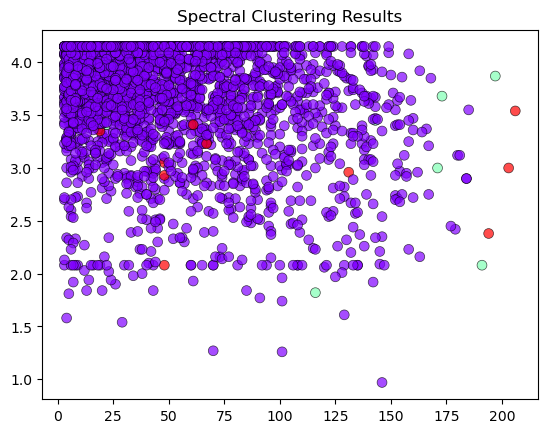

In [10]:
# Perform k-means clustering
kmeans = KMeans(n_clusters = K)
kmeans.fit(V_K)
labels = kmeans.labels_

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'rainbow', lw = 0.5, edgecolor = 'k',alpha = .7)
plt.title("Spectral Clustering Results")
plt.show()

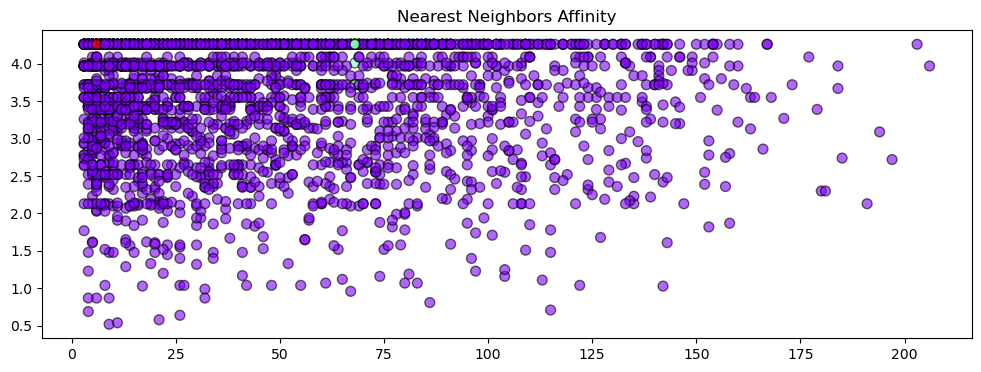

In [15]:
classifier = SpectralClustering(n_clusters = 3, affinity = 'nearest_neighbors')

fig, ax = plt.subplots(1, figsize = (12, 4))
y_pred = classifier.fit_predict(X)

ax.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'rainbow', s = 50, edgecolor = 'k', alpha = 0.6)
ax.set_title("Nearest Neighbors Affinity")

plt.show()

Distortion score and silhouette plot:

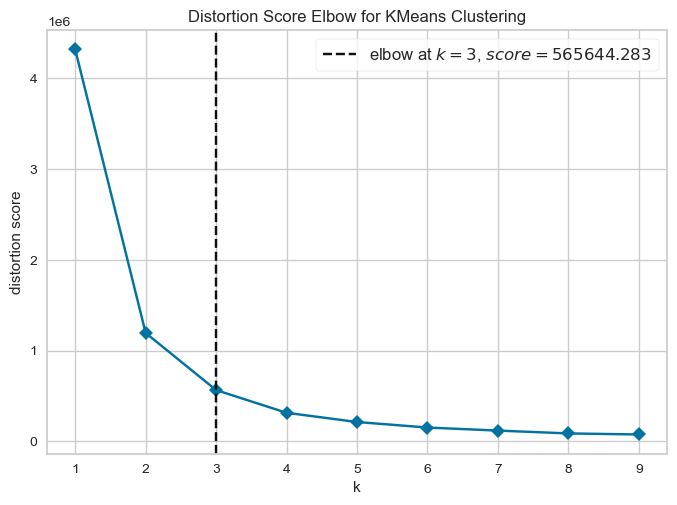

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
model = KMeans(n_init = 'auto', random_state = 0)
elbow = KElbowVisualizer(model, k = (1, 10), timings = False)
elbow.fit(X)        
elbow.show()

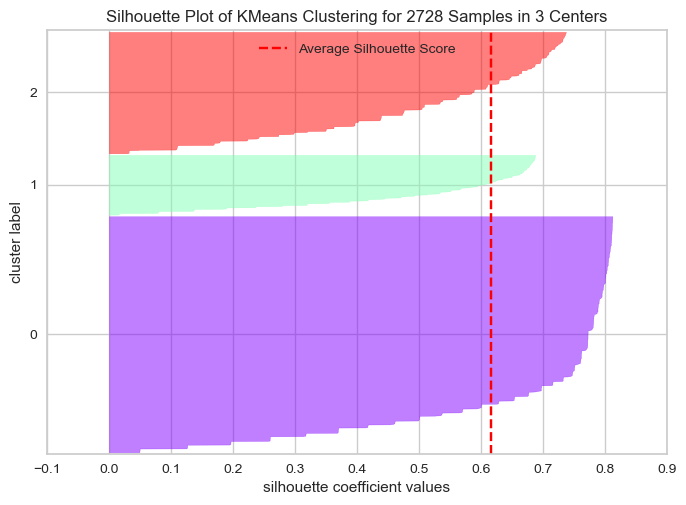

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2728 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
model = KMeans(n_clusters = 3, n_init = 'auto', random_state = 0)
sil = SilhouetteVisualizer(model, colors = 'rainbow')
sil.fit(X)        
sil.show()